In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.ndimage import gaussian_filter1d
from scipy import stats
import xarray as xr

In [2]:
data = xr.load_dataset('../../input_data/moce5/moce5_dataset.cdf', decode_timedelta=False)
simu_diusst = np.load('../../output_files/simu_diusst.npy', allow_pickle=True)
simu_slab = np.load('../../output_files/simu_slab.npy', allow_pickle=True)
simu_const = np.load('../../output_files/simu_const.npy', allow_pickle=True)

T_f = float(data.T_f)
ref_idx = 20
time_pts = data['time_day'].to_numpy()[:-1]

dsst_diusst = simu_diusst[0][:,0] - simu_diusst[0][:,ref_idx]
dsst_slab = simu_slab[0] - T_f

flux_diusst = simu_diusst[3][0] + simu_diusst[3][1] + simu_diusst[3][2]
flux_slab = simu_slab[1][0] + simu_slab[1][1] + simu_slab[1][2]
flux_const = simu_const[1][0] + simu_const[1][1] + simu_const[1][2]

training_int1 = np.arange(96,413,1)
training_int2 = np.arange(1290,1585,1)
training_idx = np.concatenate((training_int1, training_int2))
validation_int1 = np.arange(0,96,1)
validation_int2 = np.arange(413,1290,1)
validation_int3 = np.arange(1585,1851,1)
validation_idx = np.concatenate((np.concatenate((validation_int1, validation_int2)),validation_int3))

model_r = stats.pearsonr(data['dsst'][:-1],dsst_diusst)[0]
slab_r = stats.pearsonr(data['dsst'][:-1],dsst_slab)[0]

print('Reference depth: {:.3f} m'.format(simu_diusst[2][ref_idx]))

Reference depth: -3.045 m


/home/reykiboy/.local/lib/python3.10/site-packages/xarray/backends/plugins.py:71: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


/tmp/ipykernel_47907/315845669.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


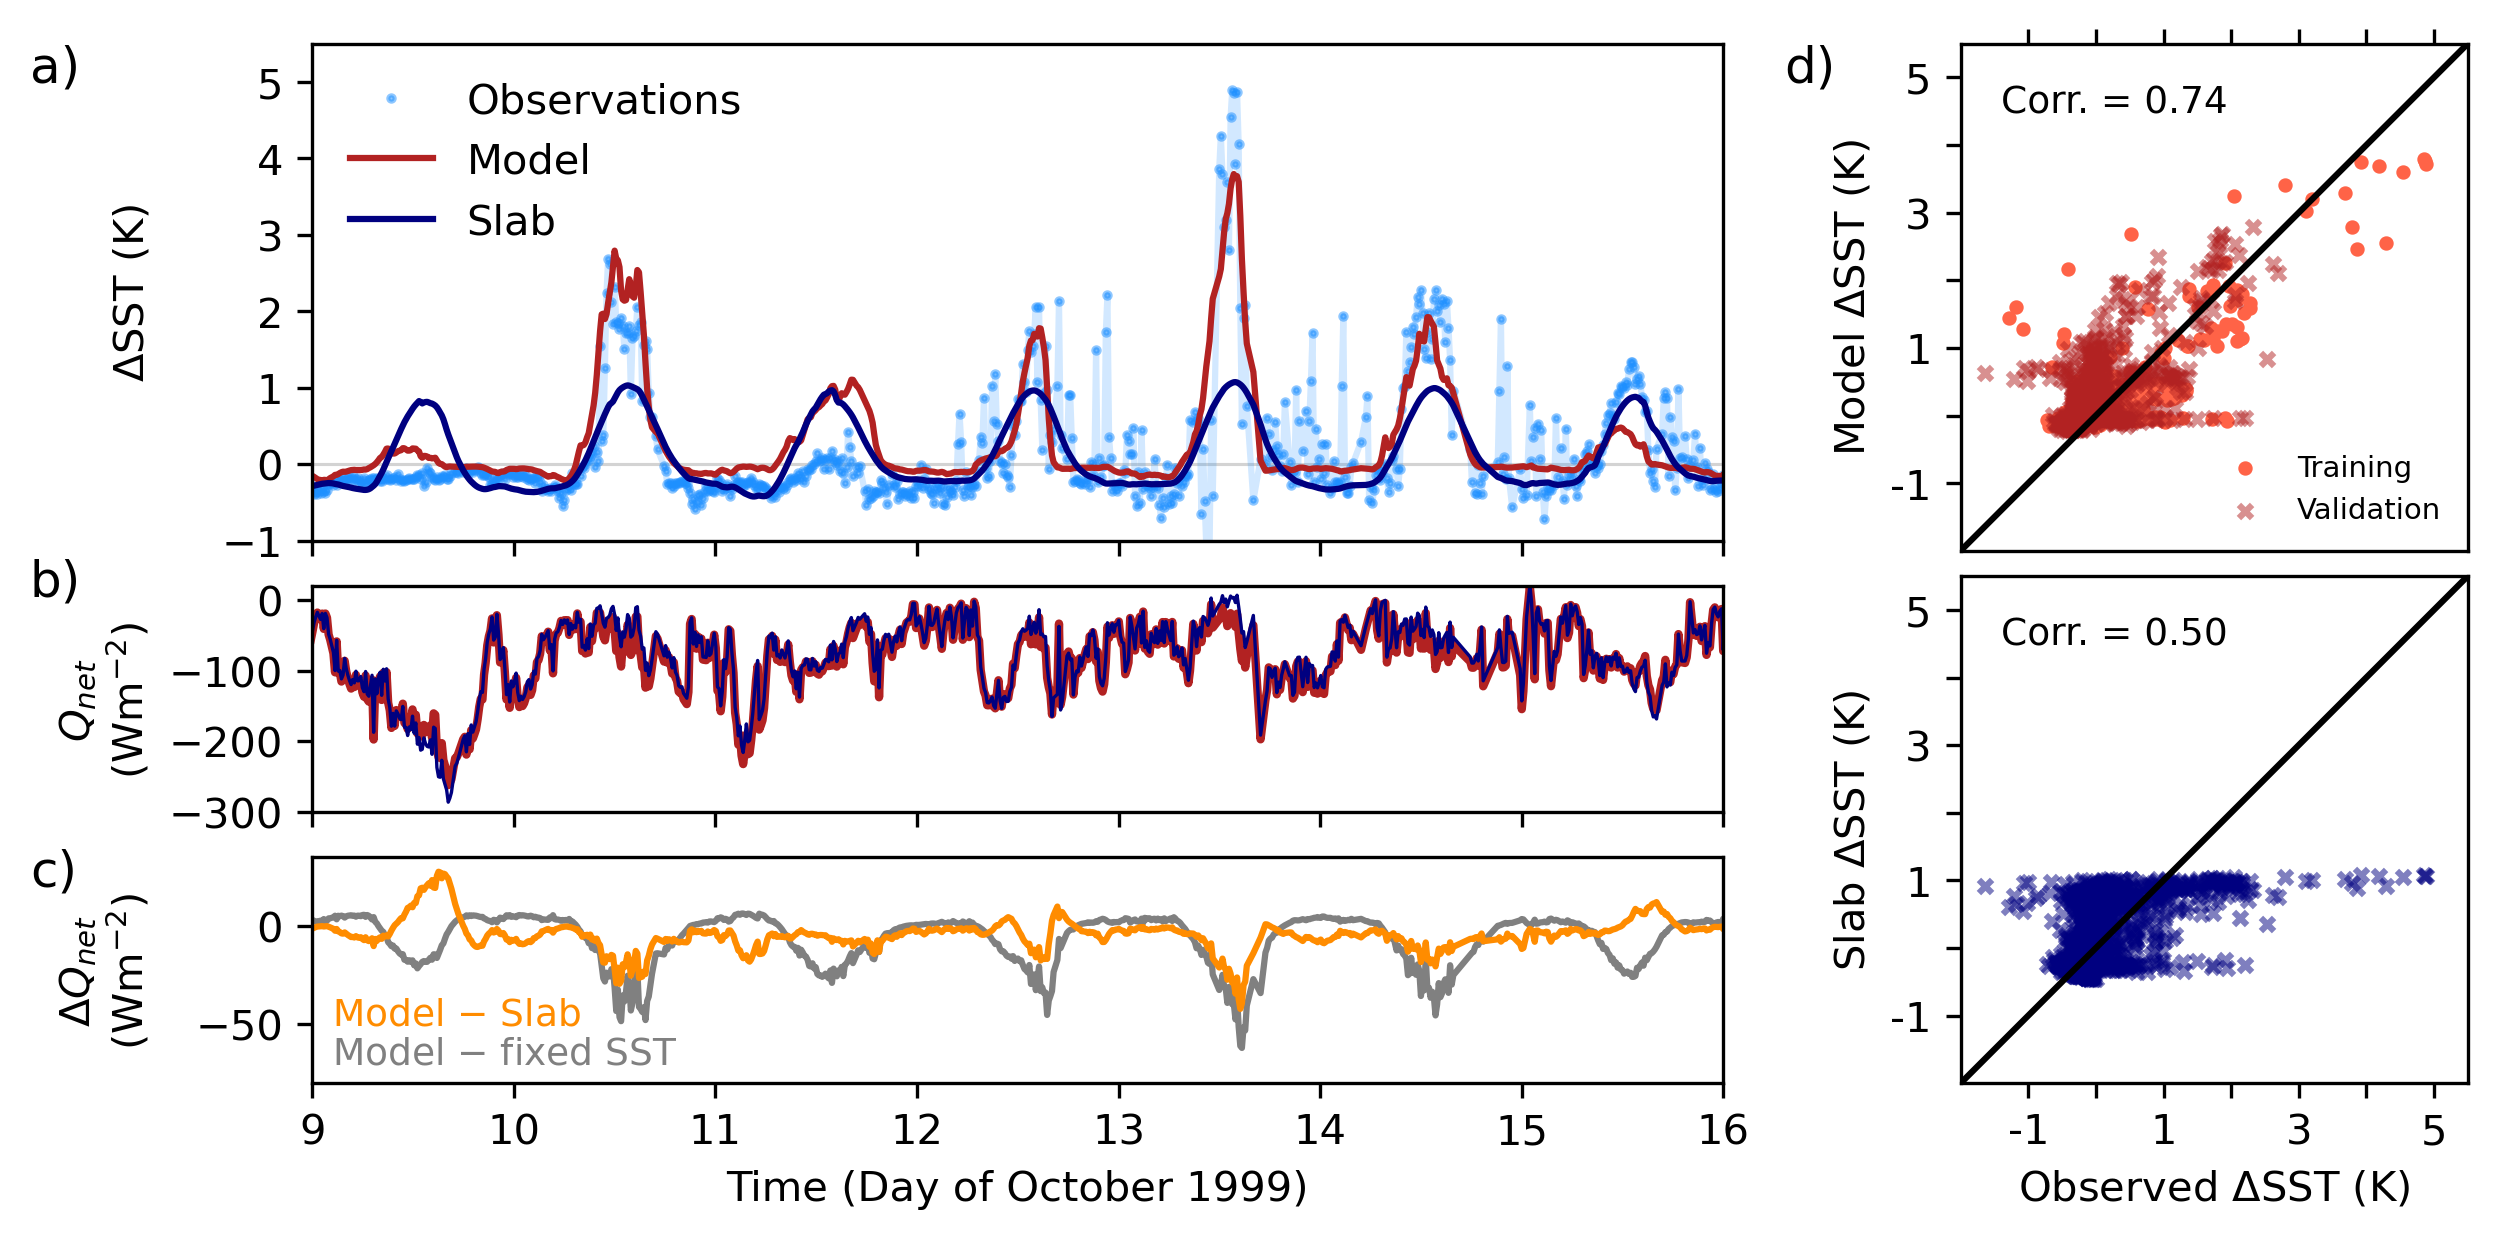

In [3]:
xmin, xmax = -2, 5.5

fig = plt.figure(dpi=300,figsize=(9.5,4.5))
gs = GridSpec(2, 3, wspace=0.3, hspace=0.05)
gs2 = gs[:,0:2].subgridspec(4,1)
ax1 = fig.add_subplot(gs2[0:2])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,2])
ax1b = fig.add_subplot(gs2[2])
ax1c = fig.add_subplot(gs2[3])

ax1.plot(data['time_day'],data['dsst'],alpha=0.2,c='dodgerblue')
ax1.plot(data['time_day'],data['dsst'],'.',markersize=3,alpha=0.5,c='dodgerblue', label='Observations')
ax1.plot(time_pts,dsst_diusst,c='firebrick', label='Model')
ax1.plot(time_pts,dsst_slab, c='navy', label='Slab')
ax1.axhline(y=0,c='lightgray',zorder=0,lw=0.75)
ax1.legend(frameon=False,loc='upper left')
ax1.set(xlim=(0,20.5),xticks=np.arange(0,21),xticklabels=[None]*21)#np.arange(0,21)+1)
ax1.set(xlim=(8,15),ylim=(-1,xmax))
ax1.set(yticks=[-1,0,1,2,3,4,5])

ax1b.plot(time_pts, flux_diusst, c='firebrick',label='Model - Slab',zorder=0,lw=2)
ax1b.plot(time_pts, flux_slab, c='navy', label='Model - const.',zorder=1,lw=.8)

ax1b.set(xlim=(0,20.5),xticks=np.arange(0,21),xticklabels=[None]*21)
ax1b.set(xlim=(8,15),ylim=(None,None), ylabel='$Q_{net}$\n(Wm$^{-2}$)')

ax1c.plot(time_pts, (flux_diusst-flux_slab), c='darkorange')
ax1c.plot(time_pts, (flux_diusst-flux_const), c='gray', zorder=-1)
ax1c.set(xlim=(0,20.5),xticks=np.arange(0,21),xticklabels=np.arange(0,21)+1)
ax1c.set(xlim=(8,15),ylim=(None,None), ylabel='$\Delta Q_{net}$\n(Wm$^{-2}$)')

ax2.plot([xmin,xmax],[xmin,xmax],c='k')
ax2.scatter(data['dsst'][training_idx],dsst_diusst[training_idx],c='tomato',marker='o',s=6, label='Training')
ax2.scatter(data['dsst'][validation_idx],dsst_diusst[validation_idx],c='firebrick',marker='x',s=10,alpha=.5, label='Validation')
ax2.legend(loc='lower right', fontsize=7, frameon=False)

ax3.plot([xmin,xmax],[xmin,xmax],c='k',zorder=10)
ax3.scatter(data['dsst'][:-1],dsst_slab,c='navy',marker='x',s=10,alpha=.5,zorder=5)

ax2.tick_params(axis='x', bottom=False, top=True, labelbottom=False, labeltop=False)
ax2.set(xticks=[-1,0,1,2,3,4,5],xticklabels=['-1',None,'1',None,'3',None,'5'])
ax3.set(xticks=[-1,0,1,2,3,4,5],xticklabels=['-1',None,'1',None,'3',None,'5'])
ax2.set(yticks=[-1,0,1,2,3,4,5],yticklabels=['-1',None,'1',None,'3',None,'5'])
ax3.set(yticks=[-1,0,1,2,3,4,5],yticklabels=['-1',None,'1',None,'3',None,'5'])

ax2.set_aspect(1)
ax3.set_aspect(1)
ax2.set(xlim=(xmin,xmax),ylim=(xmin,xmax))
ax2.set(xlim=(xmin,xmax),ylim=(xmin,xmax))
ax3.set(xlim=(xmin,xmax),ylim=(xmin,xmax))
ax3.set(xlim=(xmin,xmax),ylim=(xmin,xmax))

ax2.set(ylabel='Model $\Delta$SST (K)')
ax3.set(xlabel='Observed $\Delta$SST (K)',ylabel='Slab $\Delta$SST (K)')
ax1.set(ylabel='$\Delta$SST (K)')
ax1c.set(xlabel='Time (Day of October 1999)')

ax2.text(-1.4,4.9,'Corr. = {:.2f}'.format(model_r), fontsize=9, va='top')
ax3.text(-1.4,4.9,'Corr. = {:.2f}'.format(slab_r), fontsize=9, va='top')

ax1.text(6.6,5.5,'a)', fontsize=12,va='top')
ax1b.text(6.6,60,'b)', fontsize=12,va='top')
ax1c.text(6.6,40,'c)', fontsize=12,va='top')
ax1.text(15.3,5.5,'d)', fontsize=12,va='top')
#ax1b.legend()

ax1c.set(ylim=(-80,35))
ax1b.set(ylim=(-300,20))
ax1b.set(yticks=[-300,-200,-100,0])
ax1c.text(8.1,-50, 'Model $-$ Slab', c='darkorange', fontsize=9)
ax1c.text(8.1,-70, 'Model $-$ fixed SST', c='gray', fontsize=9)

fig.align_ylabels()
plt.tight_layout()

plt.show()

In [4]:
print(np.mean(flux_diusst))
print(np.mean(flux_slab))
print(np.mean(flux_const))

-103.00085510657148
-99.32296074578029
-97.52545487153007


In [5]:
print(np.mean(flux_diusst-flux_const))
print(np.mean(flux_slab-flux_const))

-5.475400235041413
-1.7975058742502281


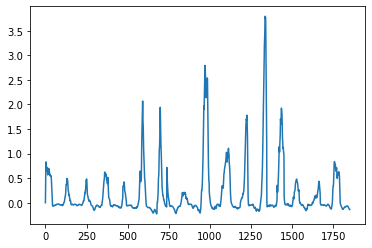

In [7]:
plt.plot(dsst_diusst)

In [8]:
np.amax(dsst_diusst)

3.7952556768474324

In [9]:
np.amin(dsst_diusst)

-0.22750544763431435